##**IE7275 Data Mining in Engineering: Project 2**

##**Shivam Bavdankar**

##**Objective**

This notebook covers a clustering analysis for a dataset containing survey responses from several participants about their running habits.

The goal of the analysis done in this notebook is to identify various clusters of survey participants based on their similar running habits. After analyzing these clusters, we can consult the company regarding which cluster would contain the maximum target customers and how different running products can be marketed to different clusters of people based on their running habits.

##**Team Members**: None
###I have worked solo on this notebook and have not collaborated with anyone.

##**Data Dictionary**

The dataset used is a survey data which comes from a pool of participants that answered various questions regarding their running habits.

The dataset consists of the following attributes:
- **record**: Dataset record number
- **id**: Unique identifier for survey participant
- **Country**: Country represented by participant (S1r1-S1r3)
    
  0: Unchecked
  
  1: Checked

  **S1r1**: United States

  **S1r2**: United Kingdom

  **S1r3**: Japan
    
- **Verification**: Indication whether participant is valid or not for survey participation (S2r1-S2r2)
    
  0: Unchecked
  
  1: Checked
  
  **S2r1**: Valid

  **S2r2**: Invalid


  - **Gender**: Participant gender (S3r1-S3r2)
    
  0: Unchecked
  
  1: Checked
  
   **S3r1**: Male

   **S3r2**: Female

  - **Age**: Participant age (S4r1-S4r6)
    
  0: Unchecked
  
  1: Checked
  
   **S4r1**: Under 18

   **S4r2**: 18-24

   **S4r3**: 25-34

   **S4r4**: 35-44

   **S4r5**: 45-54

   **S4r6**: Above 55

  - **Q1**: How regularly do you go for a run? (Q1r1-Q1r3)
    
  0: Unchecked
  
  1: Checked
  
   **Q1r1**: Occasionally when the weather is nice.

   **Q1r2**: Fairly regularly around 3-4 times a week.

   **Q1r3**: Generally 5+ times a week.

  - **Q2**: How many pairs of running shoes do you own at a time when you train? (Q2r1-Q2r4)
    
  0: Unchecked
  
  1: Checked
  
   **Q2r1**: A single pair that I use to go running in and also use for other activities.

   **Q2r2**: 1 pair of running shoes that I only use to run in.

   **Q2r3**: 3+ pairs of running shoes, some that I use for training and others that I use to race.

   **Q2r4**: 5+ pairs of running shoes depending on the type of training and racing that I'm doing.

  - **Q3**: What type of cushioning do the shoes that you train in most regularly use? (Q3r1-Q3r4)
    
  0: Unchecked
  
  1: Checked
  
   **Q3r1**: I'm not sure

   **Q3r2**: Foam

   **Q3r3**: Rubber

   **Q3r4**: Blend of foam & rubber

  - **Q4**: What type of plating do the shoes that you race in use? (Q4r1-Q4r5)
    
  0: Unchecked
  
  1: Checked
  
   **Q4r1**: I don't run races

   **Q4r2**: I use the same shoes I train in to run races

   **Q4r3**: Rubber

   **Q4r4**: Foam

   **Q4r5**: Carbon Plate

  - **Q5**: What physical activities do you do outside of running? (Q5r1-Q5r6)
    
  0: Unchecked
  
  1: Checked
  
   **Q5r1**: Activities like yoga and pilates

   **Q5r2**: Nothing outside of running

   **Q5r3**: Spinning

   **Q5r4**: Strength conditioning like lifting

   **Q5r5**: Swimming

   **Q5r6**: Hiking

  - **Q6**: What is your top complaint about the shoe you use to run in most regularly? (Q6r1-Q6r5)
    
  0: Unchecked
  
  1: Checked
  
   **Q6r1**: I have no complaints!

   **Q6r2**: They wear out too fast and I'm always having to buy new ones.

   **Q6r3**: They feel too narrow for my feet.

   **Q6r4**: They are too heavy.

   **Q6r5**: They feel great but don't feel fashionable.


   - **Q7**: What colors do you prefer for the shoes you run in most often? (Q7r1-Q7r5)
    
  0: Unchecked
  
  1: Checked
  
  **Q7r1**: Anything bright & bold

  **Q7r2**: Soft pastels - pink, coral, purple

  **Q7r3**: Earth tones - greens, yellows, browns

  **Q7r4**: Neutrals - black & white

  **Q7r5**: Something normal, no strong preference

##**Data Preparation**

In [63]:
# Importing the necessary packages and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library for KMeans Clustering Algorithm
from sklearn.cluster import KMeans

# Library for Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [64]:
# Importing the dataset

from google.colab import files
data = files.upload()

Saving survey_data.csv to survey_data (1).csv


In [65]:
# Reading the dataset
survey_df = pd.read_csv('survey_data.csv')

# Lets explore the dataset
survey_df.head()

,record,id,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,1,9731743,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
1,2,5917428,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,2459391,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,4,3277896,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,5,4986375,1,0,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0


**Observation:**

As all the columns containing the survey responses have values either 0 or 1, the given dataset is encoded in a binary fashion.

In [66]:
# Lets save the original raw data file in a separate variable before starting the analysis
df = survey_df.copy()

In [67]:
survey_df.shape

(175, 47)

**Observation:**

The dataset contains 175 rows and 47 columns.

In [68]:
# As the rows consists of people, lets see if they are unique users to identify duplications

survey_df['id'].nunique()

175

**Observation:**

As the number of rows and number of unique participant id is equal, we can confirm that there are no duplicate or repeated participants in the dataset. In total, there are 175 participants in the survey data.

In [69]:
# Finding out duplicated data

survey_df[survey_df.duplicated()]

,record,id,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5


**Observation:**

From above analysis, there are no duplicate values in the dataset.

In [70]:
# Getting summary of the data

survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   record  175 non-null    int64
 1   id      175 non-null    int64
 2   S1r1    175 non-null    int64
 3   S1r2    175 non-null    int64
 4   S1r3    175 non-null    int64
 5   S2r1    175 non-null    int64
 6   S2r2    175 non-null    int64
 7   S3r1    175 non-null    int64
 8   S3r2    175 non-null    int64
 9   S4r1    175 non-null    int64
 10  S4r2    175 non-null    int64
 11  S4r3    175 non-null    int64
 12  S4r4    175 non-null    int64
 13  S4r5    175 non-null    int64
 14  S4r6    175 non-null    int64
 15  Q1r1    175 non-null    int64
 16  Q1r2    175 non-null    int64
 17  Q1r3    175 non-null    int64
 18  Q2r1    175 non-null    int64
 19  Q2r2    175 non-null    int64
 20  Q2r3    175 non-null    int64
 21  Q2r4    175 non-null    int64
 22  Q3r1    175 non-null    int64
 23  Q3r2    175 non

**Observation:**

There are no null values in the dataset and all columns have integer data type 'int64'.

In [71]:
# As the first 2 columns 'record' and 'id' do not contribute anything to the analysis, we will drop them.

survey = survey_df.drop(columns=["record","id"])

In [72]:
# Counting the number of 1s in every column to understand the number of people belonging to that category

count_1 = survey.apply(lambda x: (x==1).sum())

print(count_1)

S1r1    103
S1r2     31
S1r3     28
S2r1    151
S2r2     26
S3r1     74
S3r2     79
S4r1     37
S4r2     25
S4r3     39
S4r4     39
S4r5     16
S4r6      8
Q1r1     51
Q1r2     55
Q1r3     49
Q2r1     42
Q2r2     53
Q2r3     47
Q2r4     16
Q3r1     56
Q3r2     28
Q3r3     69
Q3r4      8
Q4r1     52
Q4r2     43
Q4r3     36
Q4r4      6
Q4r5     18
Q5r1     62
Q5r2     11
Q5r3     46
Q5r4     66
Q5r5     37
Q5r6      1
Q6r1     29
Q6r2     26
Q6r3      9
Q6r4     15
Q6r5     91
Q7r1     31
Q7r2     38
Q7r3     41
Q7r4     29
Q7r5     26
dtype: int64


**Observation:**

There is only one participant who has selected hiking.

Considering only the valid users for the analysis. Hence, we will keep only those users who have value 1 in column 'S2r1' (Verification).

In [73]:
# In the dataset, the participants who have S2r1 as 1 are valid participants and others are invalid.
# Hence, we will keep only the valid participants

survey = survey[survey['S2r1'] == 1 ]

survey.head()

,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,S4r2,S4r3,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,1,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
1,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,1,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [74]:
# Lets check how many users are valid
survey.shape

(151, 45)

**Observation:**

151 participants are valid for survey participation.

As we are considered only valid participants, we can drop the columns of verification question (S2r1 and S2r2) as they would not add any value in our further analysis.

In [75]:
# As we have only valid participants now, we can remove the columns 'S2r1' and 'S2r2' as they won't contribute anything to the analysis

survey_new = survey.drop(columns=['S2r1','S2r2'])

survey_new.head()

,S1r1,S1r2,S1r3,S3r1,S3r2,S4r1,S4r2,S4r3,S4r4,S4r5,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,1,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [76]:
# As we have the transformed dataset now, lets find the number of participants in each response again

count_new = survey_new.apply(lambda x: (x==1).sum())

print(count_new)

S1r1    98
S1r2    25
S1r3    26
S3r1    73
S3r2    76
S4r1    34
S4r2    22
S4r3    37
S4r4    38
S4r5    16
S4r6     5
Q1r1    50
Q1r2    54
Q1r3    46
Q2r1    41
Q2r2    52
Q2r3    44
Q2r4    14
Q3r1    54
Q3r2    26
Q3r3    69
Q3r4     3
Q4r1    52
Q4r2    40
Q4r3    35
Q4r4     4
Q4r5    18
Q5r1    60
Q5r2    10
Q5r3    45
Q5r4    66
Q5r5    33
Q5r6     0
Q6r1    27
Q6r2    25
Q6r3     7
Q6r4    13
Q6r5    88
Q7r1    30
Q7r2    36
Q7r3    39
Q7r4    27
Q7r5    26
dtype: int64


**Observation:**

The Q5r6 (hiking) has not been selected by any participant. Previously, there was one participant but is filtered by removing invalid participants.

As this column (Q5r6) has no entries now, we can drop it from our dataset.

In [77]:
survey_final = survey_new.drop(columns=['Q5r6'])

survey_final.head()

,S1r1,S1r2,S1r3,S3r1,S3r2,S4r1,S4r2,S4r3,S4r4,S4r5,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,1,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


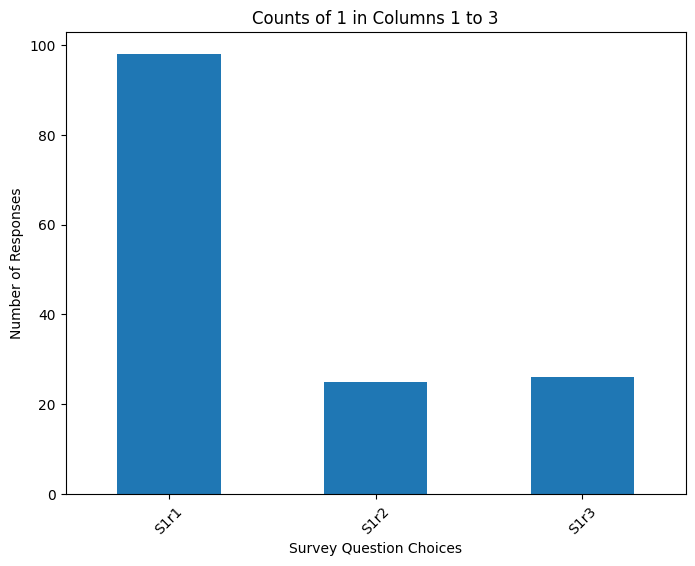

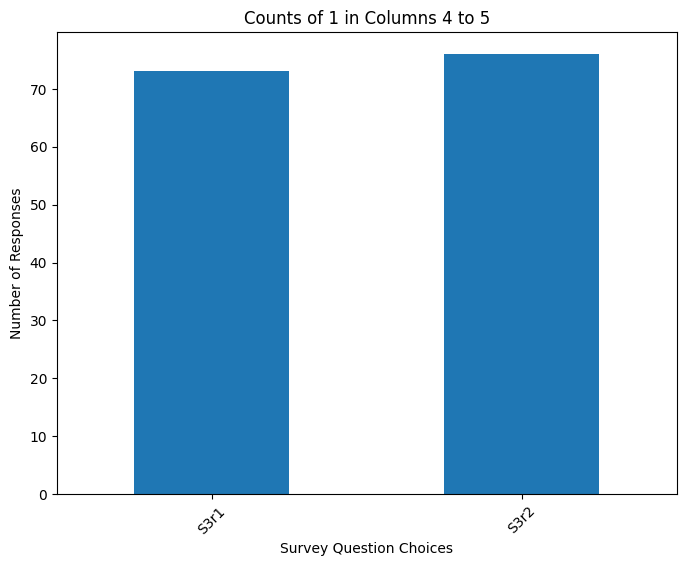

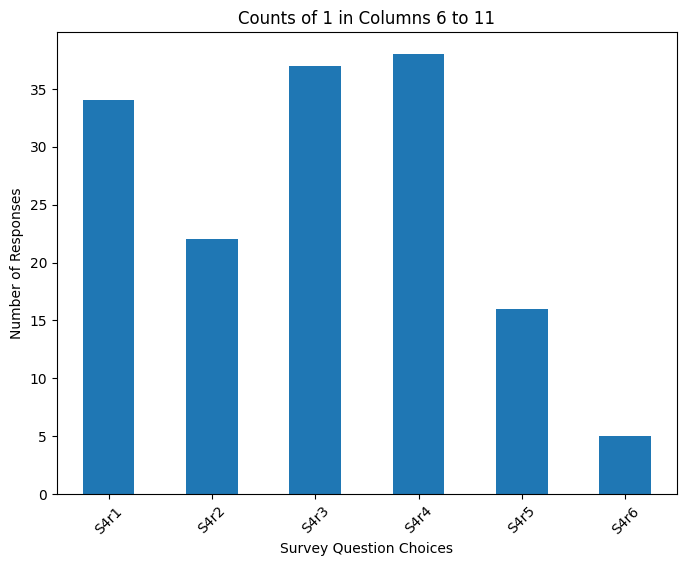

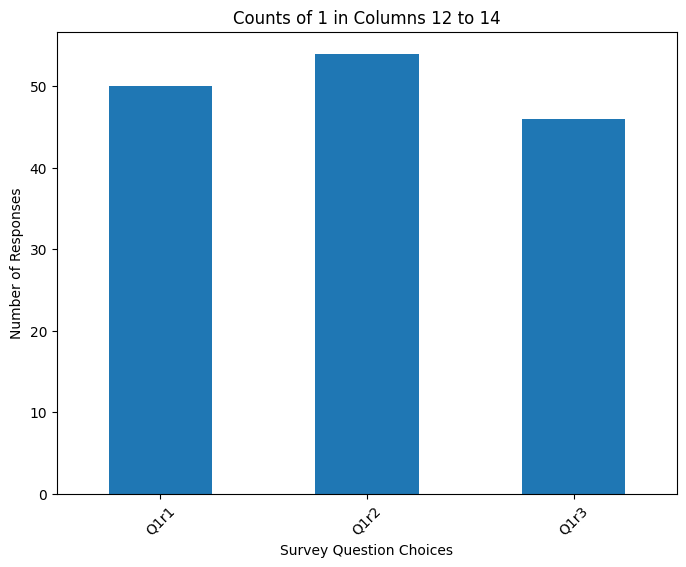

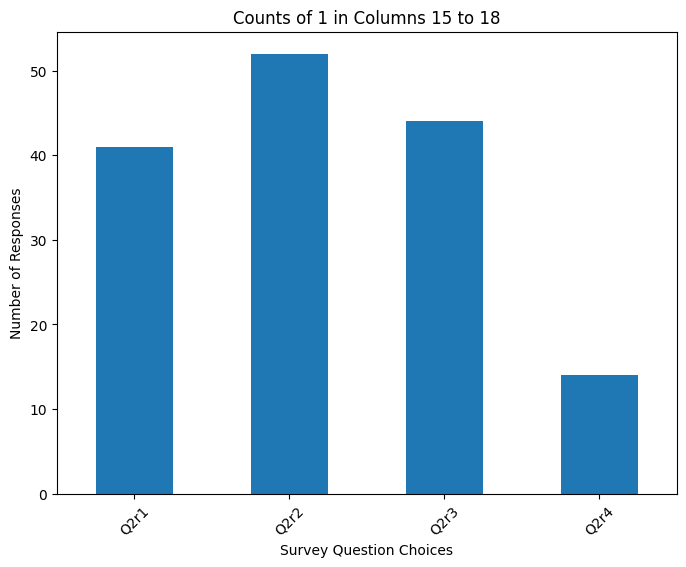

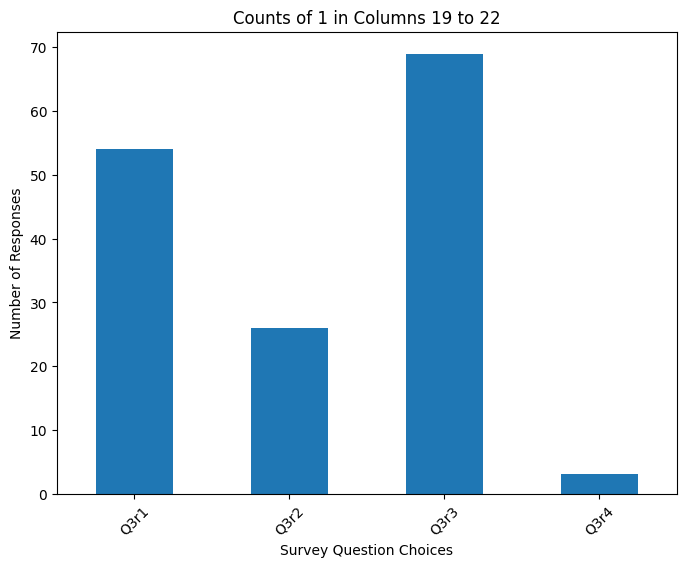

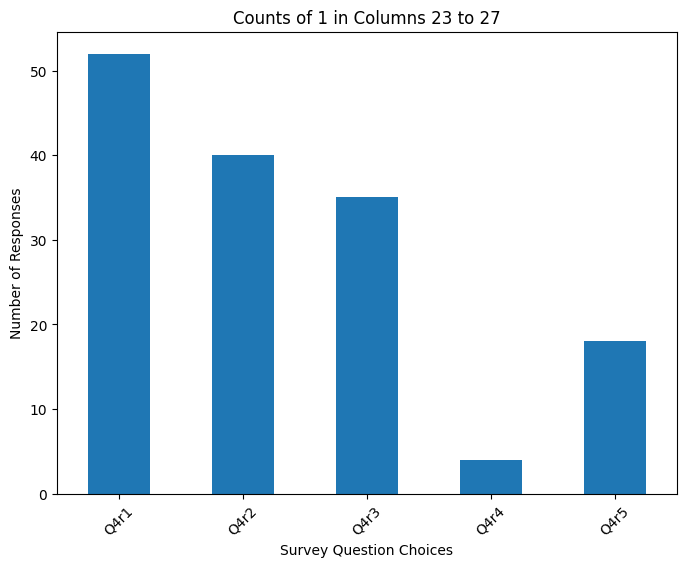

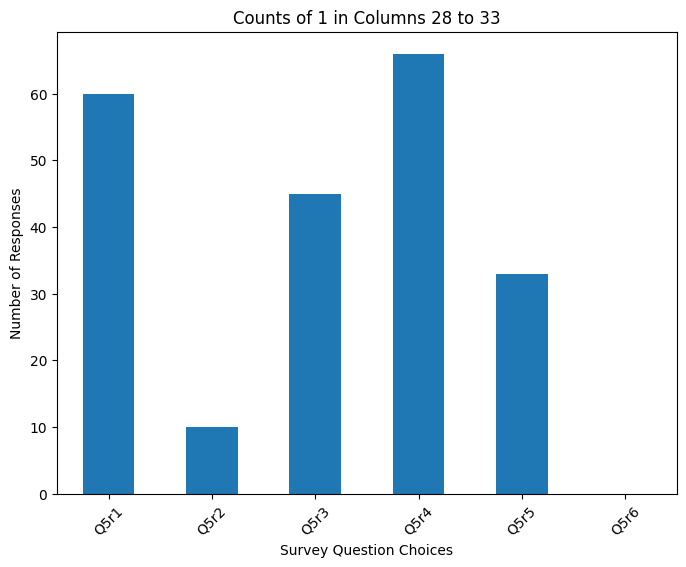

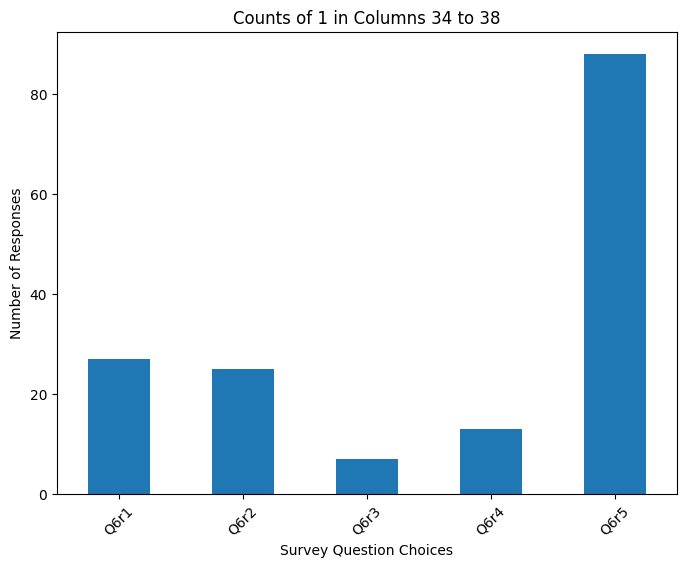

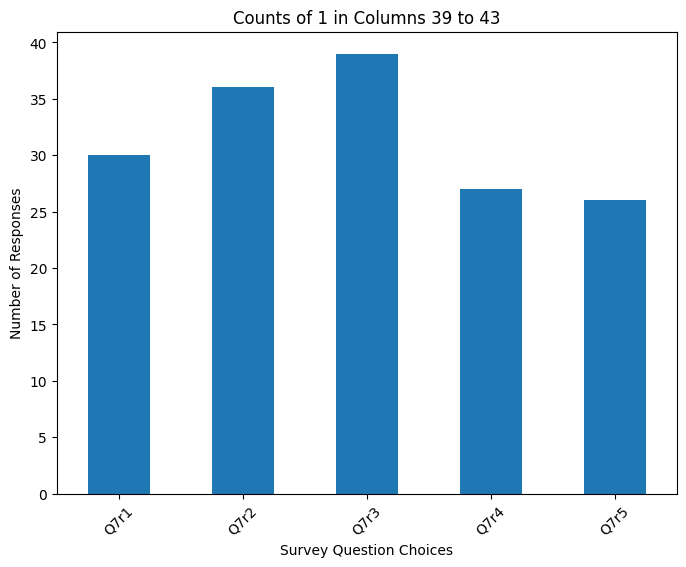

In [78]:
# Now we will make plots for every survey question to see the distribution of responses for each option present

# Defining the number of columns for each plot
columns_per_plot_list = [3, 2, 6, 3, 4, 4, 5, 6, 5, 5]

start_col = 0
for num_columns in columns_per_plot_list:
    end_col = start_col + num_columns
    current_counts = count_new.iloc[start_col:end_col]

    # Plotting
    plt.figure(figsize=(8, 6))
    current_counts.plot(kind='bar')
    plt.title(f'Counts of 1 in Columns {start_col + 1} to {end_col}')
    plt.ylabel('Number of Responses')
    plt.xlabel('Survey Question Choices')
    plt.xticks(range(len(current_counts)), current_counts.index, rotation=45)
    plt.show()

    start_col += num_columns


**Observations:**

- Majority people are from United States followed by equal distribution in Uniked Kingdom and Japan..
- There is equal distribution of males and females among the participants.
- The majority of participants have age group under 18 and in the range of 25-34 and 35-44, followed by 18-24 range.
- The participants are fairly distributed among occasional runners, regular runners and extreme runners.
- Majority of the participants have 1-3 pairs of shoes for running and very few have 5+ pairs of shoes.
- Majority of the participants have rubber cushioning in their running shoes.
- In plating of shoes as well, many participants prefer rubber. But, majority participants do not run races or they prefer to use their training shoes for races as well.
- For physical activities, majority participants lie in activities like yoga and pilates followed by strength conditioning like lifting. The least chosen activity is hiking.
- The top complaint of majority of participants about their running shoes is that the shoes feel great but they are not fashionable. This can be a key point to focus on for the running footwear and apparel company.
- For shoe color, majority of the participants prefer Earth tones like green, yellow and brown followed by soft pastels such as pink, coral and purple.

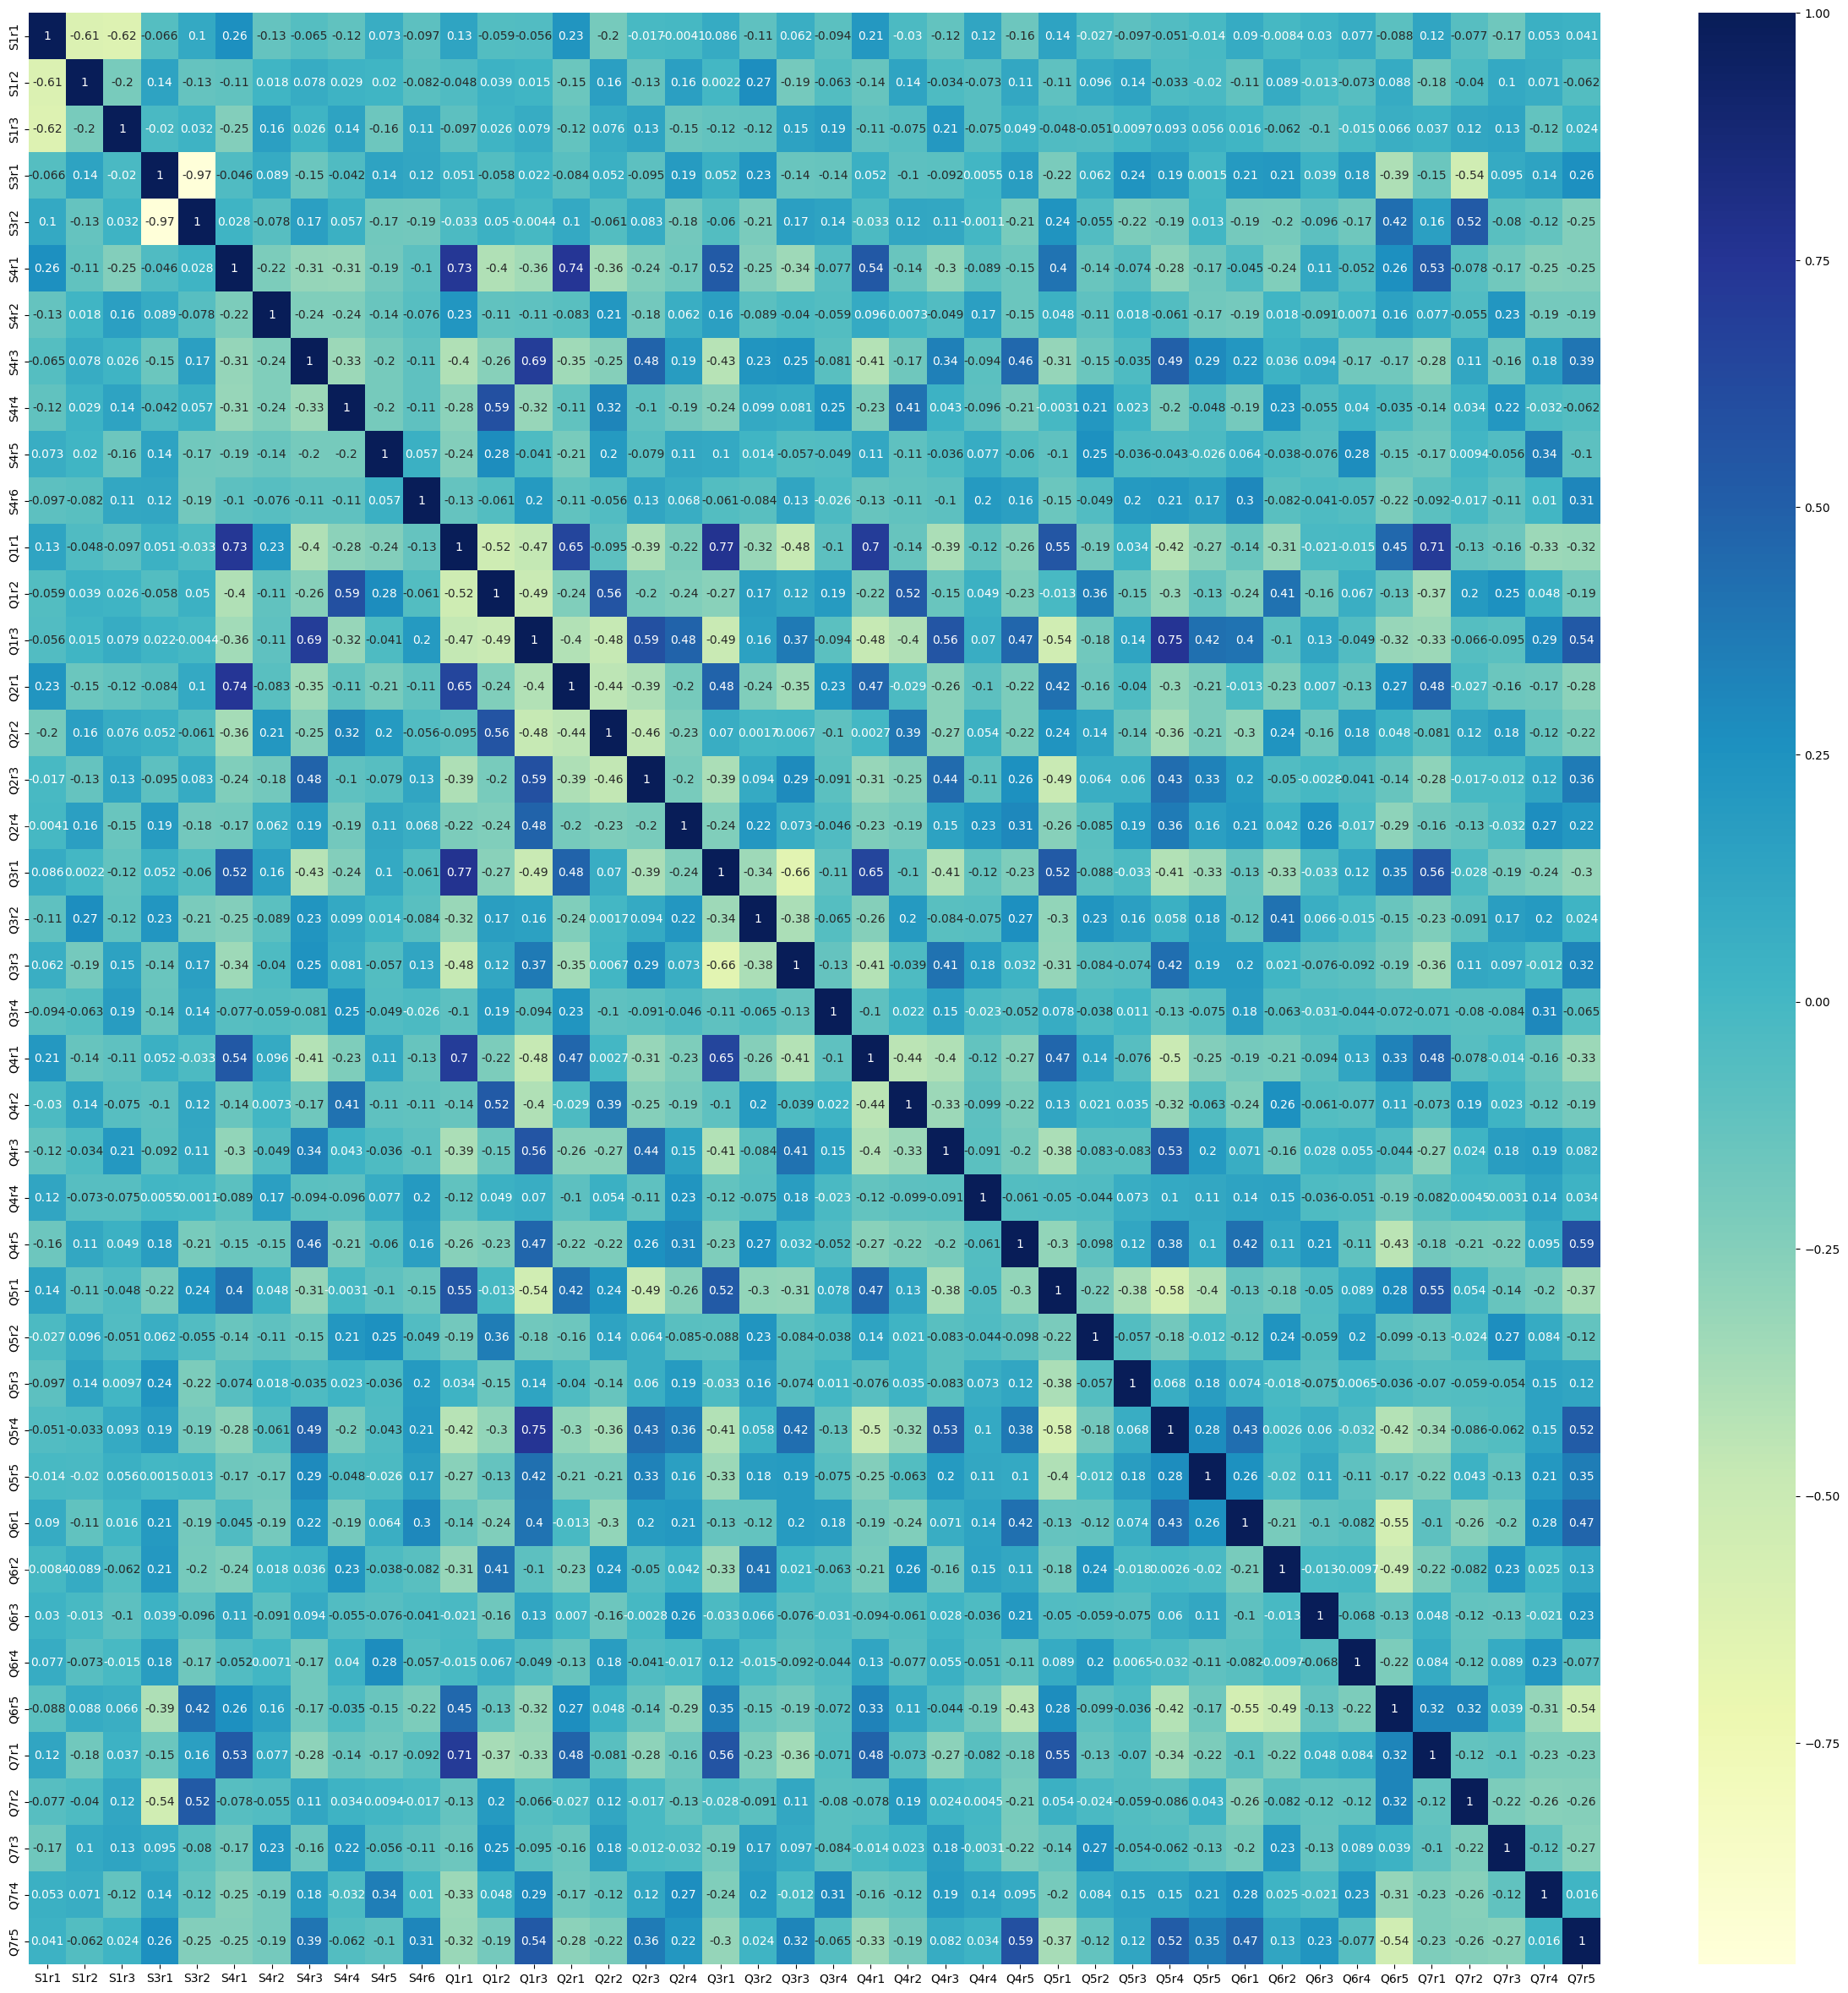

In [79]:
# Heatmap

plt.figure(figsize  = (30,30))
sns.heatmap(survey_final.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:**

- There is a strong positive correlation of 0.77 between Q1r1 (people who go for a run occasionally when the weather is nice) and Q3r1 (people who are not sure about the tyoe of cushioning in their running shoes). This makes sense as people who run occasionally when the weather is nice do not care much about the specific details of the shoes features. Their main focus is only on feeling comfortable while running in those shoes. As running is not a priority for them, they do not know about the type of cushioning present in their shoes.
- There is a positive correlation of 0.75 between Q1r3 (people who go for run more than 5 times per week) and Q5r4 (people who do Strength conditioning like lifting outside of running). This makes sense as people who run regularly are more conscious about their physical fitness. Hence, they perform strength training as well outside of running. They perform running as a cardio exercise and lifting for muscle building.
- There is a positive correlation of 0.74 between S4r1 (Participants under 18 years of age) and Q2r1 (people who use single pair of shoes for running as well as for other activities). This makes sense as people under 18 years of age are kids and they do not have developed specific taste for their shoe styles yet. Also, they are not earning so they might not be able to afford multiple pairs of shoes and hence, they are using single pair for all activities.
- There is a strong negative correlation between some answer choices which belong to the same question. This makes sense because if a user selects one choice, he would not be selecting the other choice of that same question, which results in a negative correlation between them. This is seen between S3r1 (males) and S3r2(females) with a correlation of -0.97. This is also seen in Q3r1 and Q3r3 with a correlation of -0.66.




###**As clustering is a distance based algorithm, generally dataset needs to be scaled. But, as the dataset we have is already binary encoded, all the values are on the same scale. Hence, we do not need to scale the data.**

##**Similarity Metric & Matrix**

Lets plot the elbow curve using KMeans++ to identify the optimal number of clusters.

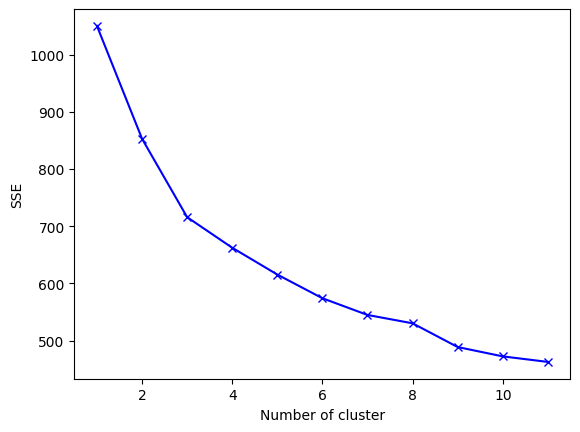

In [80]:
# Elbow Curve

#Empty dictionary to store the SSE for each value of k
sse = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
# store the inertia value for that k
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=12).fit(survey_final)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

**Observations:**

- From the above plot, we can see that there is a significant drop until 3. Then, the drop is gradual from 3 to 7. Hence, the number of clusters can be from 3 to 7.
- We will need to look at additional methods to decide on the optimal number of clusters.

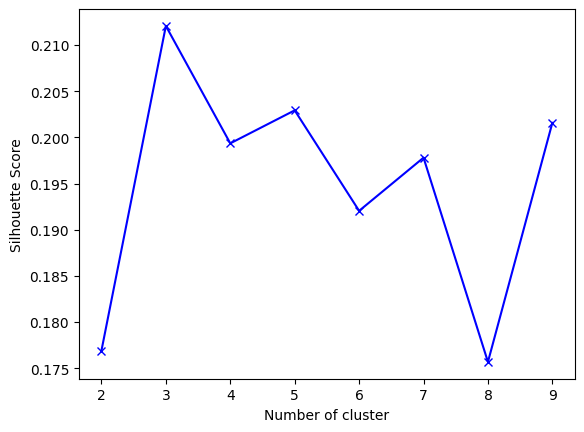

In [81]:
#Finding the optimal number of clusters from Silhouette Score plot

#Empty dictionary to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=12).fit(survey_final)
    labels = kmeans.predict(survey_final)
    sc[k] = silhouette_score(survey_final, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

**Observations:**

- As the Silhouette score is highest for k=3, we can consider number of clusters to be 3 from this plot.
- But, as we have a binary encoded data, we should pair the Silhouette score plot with Cosine similarity and Jaccard similaroty metric as they are suited better for encoded dataset.

In [82]:
# Silhouette Score Plot with Hamming Distance Metric

!pip install scikit-learn scikit-learn-extra


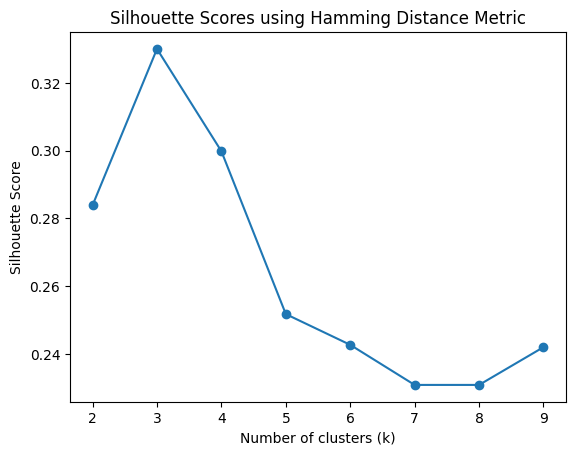

In [83]:
# Making a plot
from sklearn_extra.cluster import KMedoids

# Range of k values to try for clustering
k_values = range(2, 10)

# Store the average silhouette scores for each k
silhouette_scores = []

for k in k_values:
    # Perform KMedoids clustering using Hamming distance
    kmedoids = KMedoids(n_clusters=k, metric='hamming', random_state=12)
    cluster_labels = kmedoids.fit_predict(survey_final)

    # Calculate silhouette score using Hamming distance and append to list
    silhouette_avg = silhouette_score(survey_final, cluster_labels, metric='hamming')
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores over k
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores using Hamming Distance Metric')
plt.show()

# The k value with the highest silhouette score is considered the ideal number of clusters


**Observation**

As the score is highest for k=3, the number of clusters should be 3.

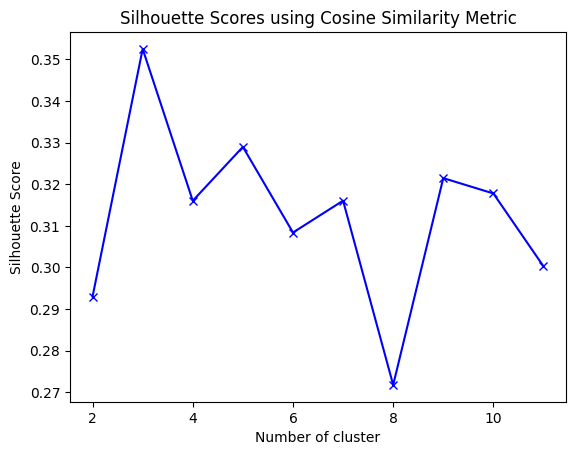

In [84]:
#Silhouette Score plot with Cosine Similarity Metric

#Empty dictionary to store the Silhouette score for each value of k

from sklearn.metrics.pairwise import cosine_similarity

sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=12).fit(survey_final)
    labels = kmeans.predict(survey_final)
    sc[k] = silhouette_score(survey_final, labels, metric = 'cosine')

# Plot the curve
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title('Silhouette Scores using Cosine Similarity Metric')
plt.show()

**Observation:**

With Cosine similarity used in Silhouette score plot, the highest value is for k=3. Hence, this tells us to have 3 clusters.

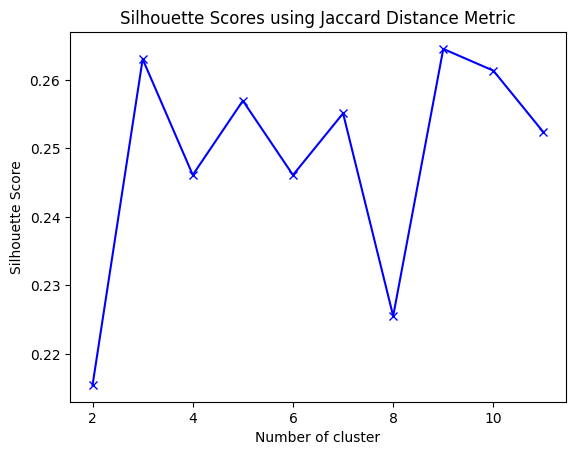

In [85]:
#Silhouette Score plot with Jaccard Similarity Metric

sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=12).fit(survey_final)
    labels = kmeans.predict(survey_final)
    sc[k] = silhouette_score(survey_final, labels, metric = 'jaccard')

# Plot the curve
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title('Silhouette Scores using Jaccard Distance Metric')
plt.show()

**Observation:**

With Jaccard similarity metric integrated in Silhouette score plot, the highest score is almost same for k=3 and k=9. But, k=9 can increase the complexity due to the high amount of clusters. Hence, 3 clusters are recommended by this plot.

**As we have a binary encoded dataset, the distances can be Non-Eucledian. Sometimes, Silhouette score is not able to process non-Eucledian distances in the best way so we will use another metric called 'Davies-Bouldin' Score using Cosine and Jaccard Similarity Metrics. As Cosine and Jaccard similarity are Non-Eucledian distances, Davies-Bouldin Scores can be used to validate and verify the above results.**

**For Davies-Bouldin Score, the number for clusters with the lowest score is preferred.**

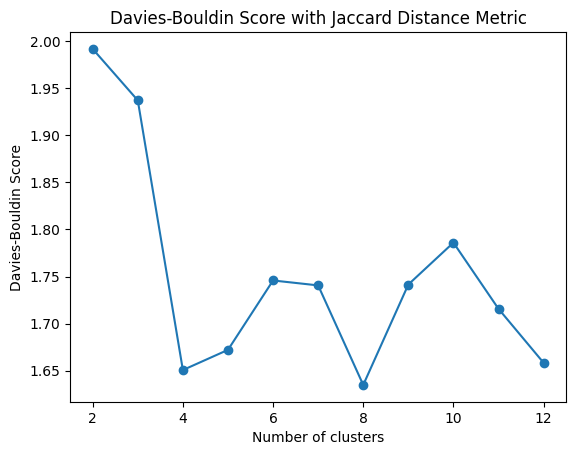

In [86]:
#Davies-Bouldin Score Plot with Jaccard Similarity

from sklearn.metrics import pairwise_distances, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

data = survey_final.to_numpy()

# Compute the Jaccard distance matrix
jaccard_distance_matrix = pairwise_distances(data, metric='jaccard')

# Range of k values
k_values = range(2, 13)
db_scores = []

for k in k_values:
    # Apply Agglomerative Clustering
    clustering = AgglomerativeClustering(n_clusters=k, affinity='precomputed', linkage='complete')
    labels = clustering.fit_predict(jaccard_distance_matrix)

    # Calculate Davies-Bouldin score
    score = davies_bouldin_score(survey_final, labels)
    db_scores.append(score)

# Plotting Davies-Bouldin scores
plt.plot(k_values, db_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score with Jaccard Distance Metric')
plt.show()


**Observation:**

- The lowest score is for k=4, which is not aligning with the previous results.
- Lets do the same plot with cosine similarity metric.

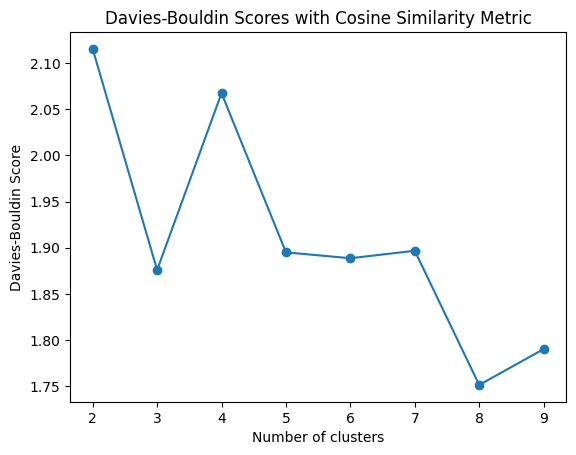

In [87]:
#Davies-Bouldin Score plot with Cosine Similariy

from sklearn.cluster import SpectralClustering
from sklearn.metrics import davies_bouldin_score

# Range of cluster values to try
cluster_values = range(2, 10)

# Store Davies-Bouldin scores for each k
db_scores = []

for k in cluster_values:
    # Apply spectral clustering with cosine similarity
    clustering = SpectralClustering(n_clusters=k, affinity='cosine', random_state=42, n_init=10)
    labels = clustering.fit_predict(survey_final)

    # Compute Davies-Bouldin score
    score = davies_bouldin_score(survey_final, labels)
    db_scores.append(score)

# Plotting Davies-Bouldin scores
plt.plot(cluster_values, db_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Scores with Cosine Similarity Metric')
plt.show()


**Observation:**

- From the above plot, the lowest score is for 8. But, for 8 clusters the computational complexity will increase too much.
- After 8, the lowest score is for 3, which validates our previous results.
- Hence, the optimal number of clusters is 3.
- Cosine similarity plot should be given more weightage than Jaccard as Cosine metric is effective when the count of 1s in dataset is of importance. As in our models, we focus on the frequency or count of 1s in every feature, we will consider the output of cosine similarity metric.

###**From the above results, we will be taking the number of clusters as 3.**

##**Clustering Algorithms**

In [88]:
# Lets make a dataset to store the cluster data from different models
survey_pred = survey_final.copy()

**KMeans Clustering**

In [89]:
# Lets build KMeans for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=12)
kmeans.fit(survey_final)

#Adding predicted labels to the original data
survey_pred['KMeans_Labels'] = kmeans.predict(survey_final)
survey_final['KMeans_Labels'] = kmeans.predict(survey_final)

In [90]:
survey_final['KMeans_Labels'].value_counts()

2    53
1    50
0    48
Name: KMeans_Labels, dtype: int64

**Observations:**

- The observations are almost equally distributed among the 3 clusters which is a good sign. Lets check the overall profile of the clusters.

In [91]:
#Calculating number of people from every answer of the original data for each cluster
freq1 = survey_final.groupby('KMeans_Labels').sum()
df_kmeans = freq1
df_kmeans.index = ['Cluster 0 Count', 'Cluster 1 Count', 'Cluster 2 Count']
df_kmeans.T

,Cluster 0 Count,Cluster 1 Count,Cluster 2 Count
S1r1,28,37,33
S1r2,8,7,10
S1r3,11,6,9
S3r1,24,26,23
S3r2,23,24,29
S4r1,1,33,0
S4r2,4,13,5
S4r3,32,0,5
S4r4,3,4,31
S4r5,4,0,12


**Observations:**

- For cluster 0, the count of S1r1, S4r3, Q1r3, Q2r3, Q3r3, Q4r3, Q5r4, Q6r1, Q6r5 and Q7r5 is the highest.

 This tells that cluster 0 consists of majority of people from United States in the age group of 25-34 who generally go for a run more than 5 times per week. Also, they own 3+ pairs of running shoes and they have different shoes to training and running. They prefer rubber for cushions and plating of their shoes. They even perform strength training like lifting. Some of them feel their shoes are not much fashionable and they do not have any strong preference in their shoe color.

 Hence, cluster 0 is of young adults who are into running and physical fitness.

- For cluster 1, the count of S1r1, S4r1, Q1r1, Q2r1, Q3r1, Q4r1, Q5r1, Q6r5, Q7r1 is the highest.

 This tells that cluster 1 consists of majority of people from United States in the age of 0-24 who go for run occasionally and use same pair of shoes for every activity. They do not run races and mainly do activities like yoga and pilates. They feel great in their shoes but do not feel fashionable and they prefer bright and bold colors in their shoes.

 Hence, cluster 1 is of young people below the age of 25 who run occasionally and generally do not own many shoes. They do not have strong preference other than preferring bright and bold color shoes.

- For cluster 2, the count of S4r4, Q1r2, Q2r2, Q3r3, Q4r2, Q5r1, Q6r5, Q7r2, Q7r3 is the highest.

 This tells that cluster 2 consists of people with age 35 and above who run fairly regularly around 3-4 times per week and have a separate pair of shoes that they use only for running races or just normal runs. They prefer rubber cushioning in their running shoes. Outside of running, they do other physical activities as well. For shoe quality, they feel its great but they wear out fast. Also, they think the shoes are not fashionable. For color preference, they prefer soft pastel and earth tones.

 Hence, cluster 2 is of older adults of age 35 and above who run regularly but are not as serious as the people in cluster 0. Also, they have a color preference of soft pastels and earth tones.

##**K-Medoids Clustering**

In [92]:
# K-Medoids

! pip install scikit-learn-extra

In [93]:
from sklearn_extra.cluster import KMedoids

In [94]:

kmedo = KMedoids(n_clusters = 3, random_state=12)
kmedo.fit(survey_final)

survey_pred['kmedoLabels'] = kmedo.predict(survey_final)
survey_final['kmedoLabels'] = kmedo.predict(survey_final)

In [95]:
survey_final.kmedoLabels.value_counts()

1    53
2    53
0    45
Name: kmedoLabels, dtype: int64

In [96]:
#Calculating number of people from every answer of the original data for each cluster
freq2= survey_final.groupby('kmedoLabels').sum()
df_kmedoids = freq2
df_kmedoids.index = ['Cluster 0 Count', 'Cluster 1 Count', 'Cluster 2 Count']
df_kmedoids.T

,Cluster 0 Count,Cluster 1 Count,Cluster 2 Count
S1r1,28,31,39
S1r2,10,9,6
S1r3,5,13,8
S3r1,43,30,0
S3r2,0,23,53
S4r1,16,0,18
S4r2,13,4,5
S4r3,0,32,5
S4r4,9,8,21
S4r5,7,5,4


**Observations:**

- For Cluster 0, the count of S3r1, S4r1, Q1r1, Q2r2, Q3r1, Q4r1, Q5r1, Q6r5, Q7r3 is the highest.

 This means that cluster 0 consists of only males who are occasional runners and have a separate shoe pair only for running. For cushioning, they are not sure but very few of them prefer foam. Outside of running, they do yoga and pilates. They like the shoes but want them to be more fashionable and they prefer earth tones color shoes.

 Hence, cluster 0 is of males who are casual runners.

- For cluster 1, the count of S4r3, Q1r3, Q2r3, Q3r3, Q4r3, Q5r4, Q6r1, Q7r5 is the highest.

 This means that cluster 1 consists of young adults who run regularly, have more than 3 pairs of shoes, prefer rubber for cushioning and shoe plates. They perform strength training outside of running and they have no complaints or preferences with their shoes.

 Hence, cluster 1 is of young adults who are regular runners and are serious about their physical fitness.

- Cluster 2 consists of only females and majority of them are from United States. It has mainly girls under age 18 and females above age 35. They are casual runners who have a single pair of shoes for running and other activities. They want their shoes to be more fashionable and prefer colors of soft pastels or bright and bold colors.

 Hence, cluster 2 consists of females who are casual runners who prefer bright, bold and soft pastel color shoes and want their shoes to be more fashionable.

##**Gaussian Mixture Clustering**

In [97]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3, random_state = 12)
gmm.fit(survey_final)

survey_pred['GmmLabels'] = gmm.predict(survey_final)
survey_final['GmmLabels'] = gmm.predict(survey_final)

In [98]:
survey_final.GmmLabels.value_counts()

2    53
1    50
0    48
Name: GmmLabels, dtype: int64

In [99]:
#Calculating number of people from every answer of the original data for each cluster
freq3 = survey_final.groupby('GmmLabels').sum()
df_gmm = freq3
df_gmm.index = ['Cluster 0 Count', 'Cluster 1 Count', 'Cluster 2 Count']
df_gmm.T

,Cluster 0 Count,Cluster 1 Count,Cluster 2 Count
S1r1,28,37,33
S1r2,8,7,10
S1r3,11,6,9
S3r1,24,26,23
S3r2,23,24,29
S4r1,1,33,0
S4r2,4,13,5
S4r3,32,0,5
S4r4,3,4,31
S4r5,4,0,12


**Observations:**

- In cluster 0, majority of people from United States in the age group of 25-34 who generally go for a run more than 5 times per week. Also, they own more than 3 pairs of running shoes and they have different shoes to training and running. They prefer rubber for cushions and plating of their shoes. They even perform strength training like lifting. Some of them feel their shoes are not much fashionable and they do not have any strong preference in their shoe color.

- In cluster 1, majority of people from United States in the age of 0-24 who go for run occasionally and use same pair of shoes for every activity. They do not run races and mainly do activities like yoga and pilates. They feel great in their shoes but do not feel fashionable and they prefer bright and bold colors in their shoes.

- In Cluster 2, majority of people from United States in the age of 0-24 who go for run occasionally and use same pair of shoes for every activity. They do not run races and mainly do activities like yoga and pilates. They feel great in their shoes but do not feel fashionable and they prefer bright and bold colors in their shoes.

##**Agglomerative Hierarchial Clustering**

In [100]:
from sklearn.cluster import AgglomerativeClustering

# Sample dataset (replace with your actual data)
#data = np.random.rand(100, 5)  # 100 observations, 5 features

# Perform Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster.fit(survey_final)

# Extract cluster labels
labels = agg_cluster.labels_

# Count the number of observations in each cluster
cluster_counts = np.bincount(labels)

# Print the number of observations in each cluster
for cluster in range(3):
    print(f"Number of observations in Cluster {cluster}: {cluster_counts[cluster]}")


Number of observations in Cluster 0: 53
Number of observations in Cluster 1: 48
Number of observations in Cluster 2: 50


In [101]:
# Add cluster labels to DataFrame
survey_final['Cluster_Label'] = labels

#Calculating number of people from every answer of the original data for each cluster
freq4 = survey_final.groupby('Cluster_Label').sum()
df_agg = freq4
df_agg.index = ['Cluster 0 Count', 'Cluster 1 Count', 'Cluster 2 Count']
df_agg.T

,Cluster 0 Count,Cluster 1 Count,Cluster 2 Count
S1r1,33,28,37
S1r2,10,8,7
S1r3,9,11,6
S3r1,23,24,26
S3r2,29,23,24
S4r1,0,1,33
S4r2,5,4,13
S4r3,5,32,0
S4r4,31,3,4
S4r5,12,4,0


**Observations:**

- In Cluster 0, there are people with age 35 and above who run fairly regularly around 3-4 times per week and have a separate pair of shoes that they use only for running races or just normal runs. They prefer rubber cushioning in their running shoes. Outside of running, they do other physical activities as well. For shoe quality, they feel its great but they wear out fast. Also, they think the shoes are not fashionable. For color preference, they prefer soft pastel and earth tones.

- In cluster 1, majority of people are from United States in the age group of 25-34 who generally go for a run more than 5 times per week. Also, they own 3+ pairs of running shoes and they have different shoes to training and running. They prefer rubber for cushions and plating of their shoes. They even perform strength training like lifting. Some of them feel their shoes are not much fashionable and they do not have any strong preference in their shoe color.

- In cluster 2, majority of people from United States below 25 years of age who go for run occasionally and use same pair of shoes for every activity. They do not run races and mainly do activities like yoga and pilates. They feel great in their shoes but do not feel fashionable and they prefer bright and bold colors in their shoes.

**Choosing the Best Model:**

- From the above clusters of 4 clustering algorithms, the clusters made by KMeans, Gaussian Mixture and Agglomerative Hierarchial model were very similar where the clustering was mainly done on the basis of frequency of running per week and shoe pairs choices.

- Whereas, K-Medoids did clustering a bit differently. It made separate clusters for males and females who were occasional runners, and made a different cluster for regular ones.

- As the gender does not create much difference for a shoe product, we will not be using K-Medoids.

- Among the other 3 models, as the clusters are same, we will need to evaluate based on other dataset factors.

- As the dataset is binary encoded with all values either 0 or 1, it needs a model which can support non-Eucledian distances as well.

- Agglomerative Hierarchial Model is better at handling non-Eucledian distances as compared to KMeans and Gaussian Mixture models.

- Hence, we will choose the **Agglomerative Hierarchial Model**.

##**Interpreting Results:**

- The clusters found among the consumers were mainly based on age factor and their frequency of runs per week.
- Out of the 3 clusters formed, one was of older people who run regularly and do mild execcises to maintain their physical fitness, other was of young adults who are hardcore runners and have multiple shoes for different activities. The third cluster was of young people below the age of 25 who are casual runners and want colorful shoes as they wear it for all the activities.

##**Recommendations for the Company:**

- The company should focus on making shoes more fashionable as most of the survey participants mentioned that shoes were great but they don't feel fashionable.

- The company should target its marketing towards people who are regular runners and like to have separate shoes for running as they can be easily influenced to buy another pair of shoes.

- The company should focus on making more shoes of rubber cushioning as most of the people have that preference.

- Young people below age 25 have a high liking for bright and bold color shoes so the company should plan its marketing accordingly.

- Whereas, slightly older people prefer earth tones and soft pastels color shoes. So, the company should target these types of shoes to people of age 35 and above.